## Horse or Human Classification

### 1. Load Libraries

In [21]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### 2. Load Dataset

In [22]:
# Load the dataset
(ds_train, ds_test), ds_info = tfds.load(
    'horses_or_humans',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

In [23]:
ds_train.element_spec

(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [24]:
ds_info

tfds.core.DatasetInfo(
    name='horses_or_humans',
    full_name='horses_or_humans/3.0.0',
    description="""
    A large set of images of horses and humans.
    """,
    homepage='http://laurencemoroney.com/horses-or-humans-dataset',
    data_dir='C:\\Users\\27676\\tensorflow_datasets\\horses_or_humans\\3.0.0',
    file_format=tfrecord,
    download_size=153.59 MiB,
    dataset_size=153.53 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=256, num_shards=1>,
        'train': <SplitInfo num_examples=1027, num_shards=2>,
    },
    citation="""@ONLINE {horses_or_humans,
    author = "Laurence Moroney",
    title = "Horses or Humans Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/h

## Data exploration
#### Check Imageshape, its label and plot that image

In [25]:
# Check Imageshape, its label
for image, label in ds_train.take(1):
    print("Image shape:", image.shape)
    print("Label:", label.numpy())

Image shape: (300, 300, 3)
Label: 0


## Preprocess data

In [26]:
# Preprocessing function
def preprocess(image, label):
    image = tf.image.resize(image, (128, 128))  # Resize to 128x128
    image = tf.cast(image, tf.float32) / 255.0   # Normalize to [0,1]
    return image, label

# Apply preprocessing
ds_train = ds_train.map(preprocess).cache().shuffle(1000).batch(16).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(16).prefetch(tf.data.AUTOTUNE)

In [27]:
# Checking Image shape, its label after preprocesing
for image, label in ds_train_scaled.take(1):
    print("Image shape:", image.shape)
    print("Label:", label.numpy())

Image shape: (16, 128, 128, 3)
Label: [1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0]


## Data Augmentation

In [28]:
# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1),
])

# Apply augmentation only to training images
ds_train = ds_train.map(lambda x, y: (data_augmentation(x, training=True), y))

In [29]:
# Take one batch from the augmented training dataset
for augmented_images, labels in ds_train_aug.take(1):
    break

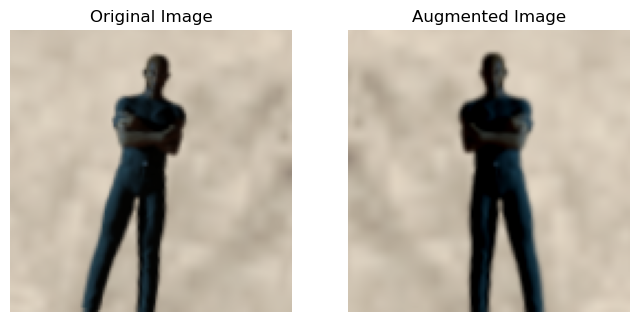

In [30]:
# Take one original image from the unaugmented dataset
for image, _ in ds_train.unbatch().take(1):
    break

# Apply augmentation manually to the original image
augmented_image = data_augmentation(tf.expand_dims(image, axis=0), training=True)[0]

# Plot both images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image.numpy())
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(augmented_image.numpy())
plt.title("Augmented Image")
plt.axis("off")
plt.show()


## Model building

In [31]:
# Build the Sequential model
def Model():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(128, 128, 3)),
        tf.keras.layers.Conv2D(8, 3, strides=(1, 1)), 
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(16, 3, strides=(1, 1)), 
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(), 
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

In [32]:
modeli = Model()

In [33]:
# Compile the model
modeli.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [34]:
# Optional: Early stopping callback
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [35]:
modeli.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 126, 126, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 126, 126, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 61, 61, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 61, 61, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        14,401 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,889 (62.07 KB)

 Trainable params: 15,841 (61.88 KB)

 Non-trainable params: 48 (192.00 B)

In [36]:
# Train the model
history = modeli.fit(ds_train, validation_data= ds_test, epochs=10, callbacks=[early_stop])

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 18s 202ms/step - accuracy: 0.6164 - loss: 0.7614 - val_accuracy: 0.5117 - val_loss: 0.6748
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 13s 191ms/step - accuracy: 0.7293 - loss: 0.5741 - val_accuracy: 0.5039 - val_loss: 0.7066
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 13s 188ms/step - accuracy: 0.7673 - loss: 0.4964 - val_accuracy: 0.7500 - val_loss: 0.5096
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 13s 194ms/step - accuracy: 0.7945 - loss: 0.4170 - val_accuracy: 0.8594 - val_loss: 0.4111
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 13s 191ms/step - accuracy: 0.8238 - loss: 0.3781 - val_accuracy: 0.9102 - val_loss: 0.3362
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 13s 189ms/step - accuracy: 0.8647 - loss: 0.2883 - val_accuracy: 0.8125 - val_loss: 0.4140
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 12s 185ms/step - accuracy: 0.8900 - loss: 0.2820 - val_accuracy: 0.7734 - val_loss: 0.5140
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 13s 192ms/step - accuracy: 0.8929 - loss: 0.2455 - val_accu

In [37]:
test_loss, test_accuracy = modeli.evaluate(ds_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9102 - loss: 0.3362
Test Accuracy: 0.9102
Test Loss: 0.3362


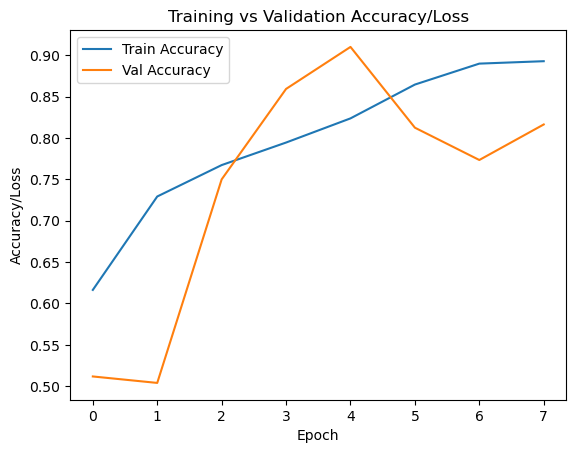

In [38]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.title('Training vs Validation Accuracy/Loss')
plt.show()

## Predictions and Confution matrix

In [39]:
# Make predictions
y_pred_probs = modeli.predict(ds_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten() # converting y_pred value to binary

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


In [40]:
# Extract true labels
y_true = []
for _, label in ds_test.unbatch():
    y_true.append(label.numpy())
y_true = np.array(y_true)

<Figure size 600x400 with 0 Axes>

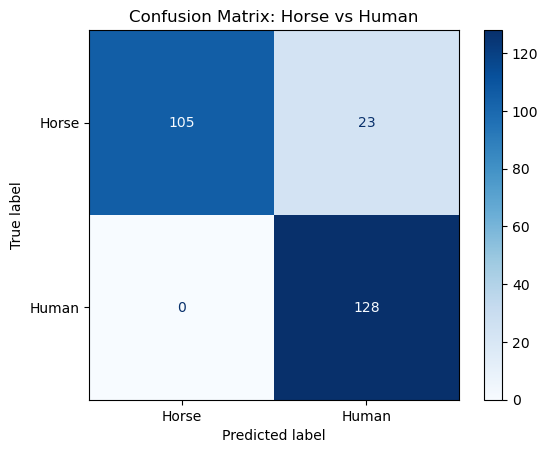

In [41]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Horse', 'Human'])

plt.figure(figsize=(6, 4))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix: Horse vs Human")
plt.show()